<a href="https://colab.research.google.com/github/zervald/Lab-INF600F/blob/personal/lab7/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratoire 6
- Segmentation de contours
- TP2 (le solutionnaire ne sera pas remis)
- D'autres questions?

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import skimage.data
from skimage.feature import canny
from scipy.ndimage import gaussian_filter, convolve, correlate
from math import sin, cos, tan, radians

## Exercice 1
Implémenter en partie le filtre de Sobel:
1. Si l'image est bruité, appliquer un filtre gaussian
2. Trouver les contours
    - Trouver les gradients X
    - Trouver les gradients Y
2. Combiner les gradients pour obtenir le résultat final

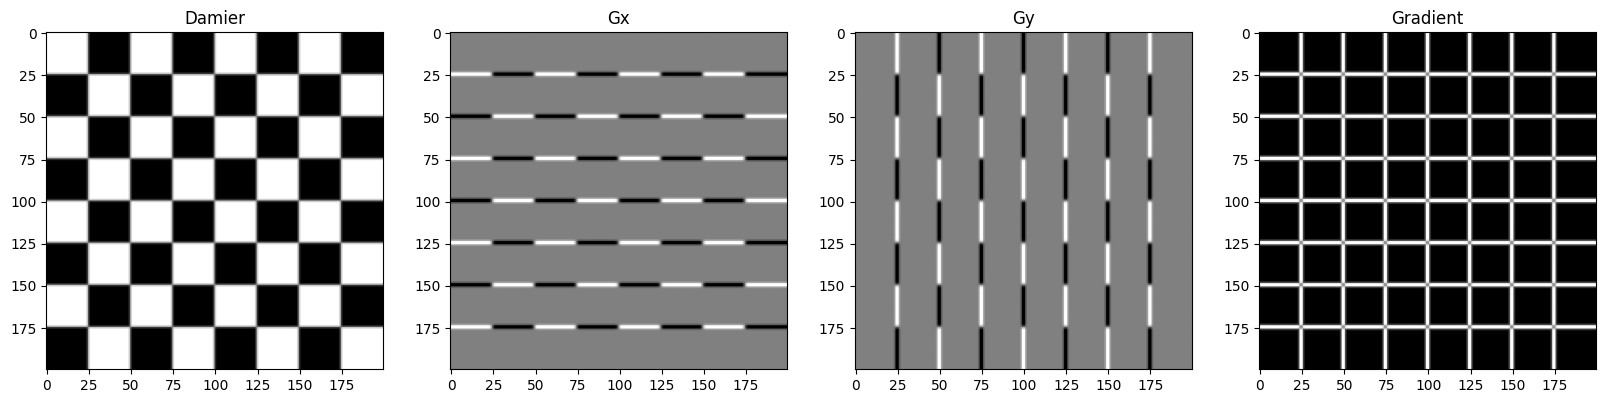

In [8]:
img = skimage.data.checkerboard().astype(np.int64)

hx = [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]]

hy = [[-1, 0 , 1],
      [-2, 0 , 2],
      [-1, 0 , 1]]

plt.figure(figsize=(20,20))

plt.subplot(141); plt.title('Damier'); plt.imshow(img, cmap='gray')

gx = convolve(img, hx)
plt.subplot(142); plt.title('Gx'); plt.imshow(gx, cmap='gray')

gy = convolve(img, hy)
plt.subplot(143); plt.title('Gy'); plt.imshow(gy, cmap='gray')

g = ((gx**2) + (gy**2))**(1/2)
plt.subplot(144); plt.title('Gradient'); plt.imshow(g, cmap='gray')

plt.show()

## Exercice 2
Appliquer la méthode de Canny avec différentes valeurs pour le *sigma* et les *thresholds*.

In [ ]:
help(canny)

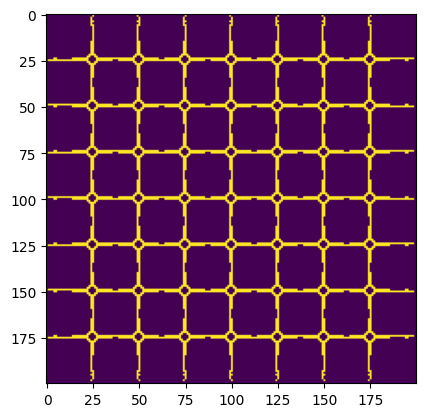

In [12]:
res = canny(img.astype(float), sigma=2, low_threshold=120, high_threshold=240)
plt.imshow(res)
plt.show()

## Exercice 3
Tracer la courbe des points **(x:3, y:9)** et **(x:10, y:5)** dans l'espace paramètre de la transformer de Hough

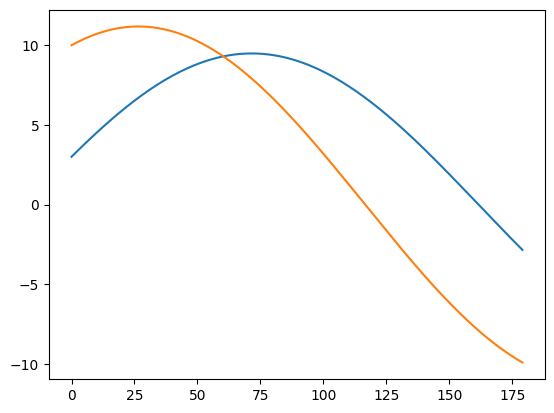

In [19]:
thetas = range(0, 180, 1)
rho1 = []
rho2 = []

for theta in thetas:
  rho = 3 * cos(radians(theta)) + 9 * sin(radians(theta))
  rho1.append(rho)

for theta in thetas:
  rho = 10 * cos(radians(theta)) + 5 * sin(radians(theta))
  rho2.append(rho)

plt.plot(thetas, rho1)
plt.plot(thetas, rho2)
plt.show()

Afficher maintenant la droite trouvée avec l'intersection des 2 courbes dans le domaine de l'image.  
L'axe **X** de l'image est sur 15.

1.0471975511965976


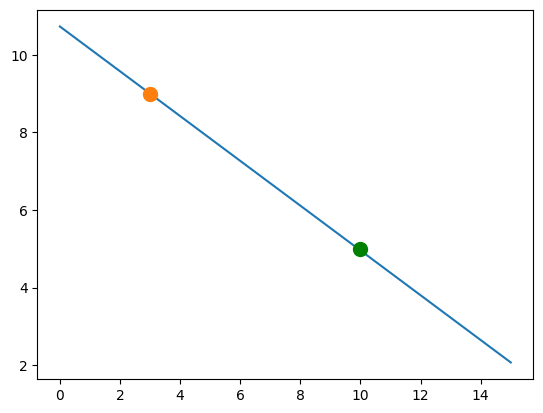

In [36]:
xs = [0, 15]
ys = []
diffabs = abs(np.array(rho1) - np.array(rho2))
indice = np.where(diffabs == diffabs.min())
theta = radians(indice[0][0])
rho = rho1[indice[0][0]]
print(theta)


for x in xs:
  y = (rho - x*cos(theta)) / sin(theta)
  ys.append(y)

plt.plot(xs, ys)
plt.plot([3],[9],marker='o', markersize=10)
plt.plot([10],[5],marker='o', markersize=10, color="green")
plt.show()